In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### 1. IMPORTING DATA

In [2]:
flight_df = pd.read_excel('FARE DATA.xlsx')
flight_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## 2. DATA PRE PROSESSING

### 2.1 Handling Missing data

In [4]:
flight_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
flight_df.dropna(inplace=True)

In [6]:
flight_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
len(flight_df[flight_df['Additional_Info'] == 'No info'])

8344

In [8]:
flight_df.drop(['Additional_Info'],axis=1,inplace=True)

## 2.2 ENCODING CATAGORICAL DATA

In [9]:
len(flight_df["Airline"].unique())

12

In [10]:
air_dum = flight_df[["Airline"]]
air_dum = pd.get_dummies(air_dum, drop_first= True)
air_dum

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [11]:
len(flight_df["Source"].unique())

5

In [12]:
sour_dum = flight_df[["Source"]]
sour_dum = pd.get_dummies(sour_dum, drop_first= True)
sour_dum

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [14]:
len(flight_df["Destination"].unique())

6

In [15]:
dest_dum = flight_df[["Destination"]]
dest_dum = pd.get_dummies(dest_dum, drop_first= True)
dest_dum

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [17]:
flight_df.drop(["Route"], axis = 1, inplace = True)

In [18]:
flight_df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [19]:
flight_df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
flight_df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1,13302
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,0,4107
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,0,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,0,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,0,12648


In [20]:
flight_df = pd.concat([flight_df, air_dum, sour_dum, dest_dum], axis = 1)
flight_df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
flight_df

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,22:20,01:10 22 Mar,2h 50m,0,3897,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1/05/2019,05:50,13:15,7h 25m,2,7662,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,9/06/2019,09:25,04:25 10 Jun,19h,2,13882,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
3,12/05/2019,18:05,23:30,5h 25m,1,6218,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,01/03/2019,16:50,21:35,4h 45m,1,13302,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,9/04/2019,19:55,22:25,2h 30m,0,4107,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10679,27/04/2019,20:45,23:20,2h 35m,0,4145,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10680,27/04/2019,08:20,11:20,3h,0,7229,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
10681,01/03/2019,11:30,14:10,2h 40m,0,12648,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
flight_df.columns

Index(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Price', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

### 2.3 HANDLING DATE TIME FEATURES

In [22]:
flight_df['Day_of_flight'] = pd.to_datetime(flight_df.Date_of_Journey,format='%d/%m/%Y').dt.day
flight_df['Month_of_flight'] = pd.to_datetime(flight_df.Date_of_Journey,format='%d/%m/%Y').dt.month

In [23]:
flight_df['Dep_hr'] = pd.to_datetime(flight_df.Dep_Time,format='%H:%M').dt.hour
flight_df['Dep_min'] = pd.to_datetime(flight_df.Dep_Time,format='%H:%M').dt.minute

In [24]:
flight_df['AR_hr'] = pd.to_datetime(flight_df.Arrival_Time).dt.hour
flight_df['AR_min'] = pd.to_datetime(flight_df.Arrival_Time).dt.minute

In [25]:
# Assigning and converting Duration column into list
duration = list(flight_df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
    
flight_df["Dur_hr"] = duration_hours
flight_df["Dur_min"] = duration_mins

In [26]:
flight_df.columns

Index(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Price', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Day_of_flight',
       'Month_of_flight', 'Dep_hr', 'Dep_min', 'AR_hr', 'AR_min', 'Dur_hr',
       'Dur_min'],
      dtype='object')

In [27]:
flight_df.drop(["Date_of_Journey","Dep_Time",'Arrival_Time','Duration'],axis=1,inplace=True)
flight_df

,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,...,Destination_Kolkata,Destination_New Delhi,Day_of_flight,Month_of_flight,Dep_hr,Dep_min,AR_hr,AR_min,Dur_hr,Dur_min
0,0,3897,0,0,1,0,0,0,0,0,...,0,1,24,3,22,20,1,10,2,50
1,2,7662,1,0,0,0,0,0,0,0,...,0,0,1,5,5,50,13,15,7,25
2,2,13882,0,0,0,1,0,0,0,0,...,0,0,9,6,9,25,4,25,19,0
3,1,6218,0,0,1,0,0,0,0,0,...,0,0,12,5,18,5,23,30,5,25
4,1,13302,0,0,1,0,0,0,0,0,...,0,1,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,0,0,0,0,0,0,0,0,...,0,0,9,4,19,55,22,25,2,30
10679,0,4145,1,0,0,0,0,0,0,0,...,0,0,27,4,20,45,23,20,2,35
10680,0,7229,0,0,0,1,0,0,0,0,...,0,0,27,4,8,20,11,20,3,0
10681,0,12648,0,0,0,0,0,0,0,0,...,0,1,1,3,11,30,14,10,2,40


### 3. BUILDING SVM MODEL

#### 3.1 TRAIN TEST SPLIT

In [28]:
X = flight_df.drop('Price',axis=1)
Y = flight_df[['Price']]

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [30]:
pd.set_option('display.max_columns', None)
X

,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Day_of_flight,Month_of_flight,Dep_hr,Dep_min,AR_hr,AR_min,Dur_hr,Dur_min
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,5,5,50,13,15,7,25
2,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,9,6,9,25,4,25,19,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,12,5,18,5,23,30,5,25
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,9,4,19,55,22,25,2,30
10679,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,27,4,20,45,23,20,2,35
10680,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,27,4,8,20,11,20,3,0
10681,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,3,11,30,14,10,2,40


### 3.2 FEATURE SCALING

In [31]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

In [32]:
X_train

array([[ 0.26617015, -0.44053112, -0.13719451, ...,  0.32276211,
        -0.01864144,  0.1020488 ],
       [ 1.74795544,  2.26998718, -0.13719451, ...,  0.92858386,
         1.63802462,  0.1020488 ],
       [ 0.26617015, -0.44053112, -0.13719451, ...,  0.32276211,
        -0.01864144,  0.1020488 ],
       ...,
       [ 0.26617015, -0.44053112, -0.13719451, ..., -0.8888814 ,
         0.45469172, -0.19318881],
       [ 0.26617015, -0.44053112, -0.13719451, ..., -1.49470315,
         0.09969185, -1.66937685],
       [ 0.26617015, -0.44053112, -0.13719451, ...,  1.83731649,
         0.45469172,  0.1020488 ]])

In [33]:
y_train

array([[ 0.92793253],
       [ 0.78119457],
       [-0.64382769],
       ...,
       [-0.09858487],
       [ 0.67184346],
       [ 0.86093877]])

### 4. TRAINING AND PREDICTING 

In [34]:
y_train = y_train.flatten()

In [35]:
from sklearn.svm import SVR
model = SVR(kernel = 'rbf')
model.fit(X_train, y_train)

SVR()

In [36]:
precdicted = sc_y.inverse_transform(model.predict(sc_X.transform(X_test)))

In [37]:
precdicted

array([11297.21289173,  4314.75670046,  6297.36512757, ...,
       12954.52787846,  9923.20416975, 10903.74089885])

In [38]:
y_test.head()

,Price
3880,10844
539,4174
3052,6838
3745,3873
1584,14714


In [39]:
y_test = y_test['Price']

In [40]:
y_test = y_test.array

###  5. EVALUATING THE MODEL

Text(0, 0.5, 'y_test')

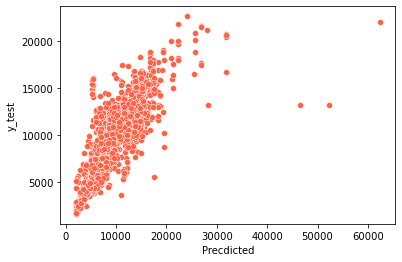

In [41]:
sns.scatterplot(x= y_test, y=precdicted, color = 'tomato')
plt.xlabel('Precdicted')
plt.ylabel('y_test')

In [42]:
diff = y_test - precdicted
diff.std()

2435.5795604667264

In [43]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, precdicted))
print('MSE:', metrics.mean_squared_error(y_test, precdicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,precdicted)))

MAE: 1428.9418917367516
MSE: 5940213.634130452
RMSE: 2437.2553485694625


In [44]:
metrics.r2_score(y_test, precdicted)

0.7147128127818477

### 6. SAVING THE MODELS

In [45]:
import pickle
# open a file, where you ant to store the data
file = open('fare_model.pkl', 'wb')
pickle.dump(model, file)
file.close()

In [46]:
# storing the feature scaling model of Y to inverse the predicted value in app.py
file_1 = open('feature_scale_model.pkl', 'wb')
pickle.dump(sc_y,file_1)
file_1.close()

In [47]:
# storing the feature scaling model of X to tranform the attributes in app.py
file_2 = open('X_feature_scale_model.pkl', 'wb')
pickle.dump(sc_X,file_2)
file_2.close()